# Looking at an experiment object

## Intro

With this notebook, we can:
- create an Experiment object from a data file
- visualise edges, graph, ..

## Creating Experiment objet

### Imports

In [3]:
import os
from amftrack.util.sys import get_current_folders_local, update_plate_info_local, data_path
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment, Node, Edge, plot_raw_plus
from random import choice
from pymatreader import read_mat
import numpy as np
import cv2
import matplotlib.pyplot as plt
from amftrack.plotutil import plot_t_tp1
%load_ext autoreload
%autoreload 2
%matplotlib notebook

### Select folder

This is the directory where there should plate folders

In [4]:
#directory = "/data/felix/width1/full_plates/"
plate_name = "20220330_2357_Plate19"
directory = os.path.join(data_path) + "/"

In [5]:
update_plate_info_local(directory)

analysed:   0%|          | 0/8 [00:00<?, ?it/s]

In [6]:
folder_df = get_current_folders_local(directory)

### Select a plate

In [7]:
selected_df = folder_df.loc[folder_df['folder']==plate_name]

In [8]:
selected_df

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp
11237,/home/felix/Wks/amolf/20220330_2357_Plate19,961,19,'Carrot','A5','001P100N100C','Y','-',20220328,25,...,True,False,False,True,True,False,False,"30.03.2022, 23:57:",20220330_2357_Plate19,NaN


### Create Experience object

In [9]:
i = 0

In [10]:
plate = int(list(selected_df['folder'])[i].split('_')[-1][5:])
folder_list = list(selected_df['folder'])
directory_name = folder_list[i]

In [11]:
plate

19

In [12]:
directory

'/home/felix/Wks/amolf/'

In [13]:
exp = Experiment(plate, directory)
exp.load(selected_df.loc[selected_df['folder']==directory_name],labeled=False)

2022-03-30 23:57:00


## Visualisation

### Selecting the graph and coordinates of a timestep

In [16]:
(G, pos) = exp.nx_graph[0],exp.positions[0]

In [17]:
print(f"Objet G: de type {type(G)}, pos[0]: {pos[0]}")
print(len(G), len(pos))

Objet G: de type <class 'networkx.classes.graph.Graph'>, pos[0]: [ 8188 26296]
1019 1399


### Choosing an edge

In [18]:
edge = choice(list(G.edges))

In [56]:
edge_exp = Edge(Node(edge[0],exp),Node(edge[1],exp),exp)

### 1/ Visualizing a node on original image

In [224]:
edge_exp.begin.show_source_image(0,0)
edge_exp.end.show_source_image(0,0)

NameError: name 'edge_exp' is not defined

### 2/ Visualize a group of node

In [58]:
group_nodes = [edge_exp.begin.label,edge_exp.end.label]
print(group_nodes)

[590, 577]


In [223]:
plot_raw_plus(exp,0,group_nodes)

NameError: name 'group_nodes' is not defined

### 3/ Visualize a skeleton

In [69]:
folder_list = list(selected_df['total_path'])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 1
start = 0

finish = start+2
for folder in folder_list[start:finish]:
    path_snap=folder
    skel_info = read_mat(path_snap+'/Analysis/skeleton_pruned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)

<IPython.core.display.Javascript object>


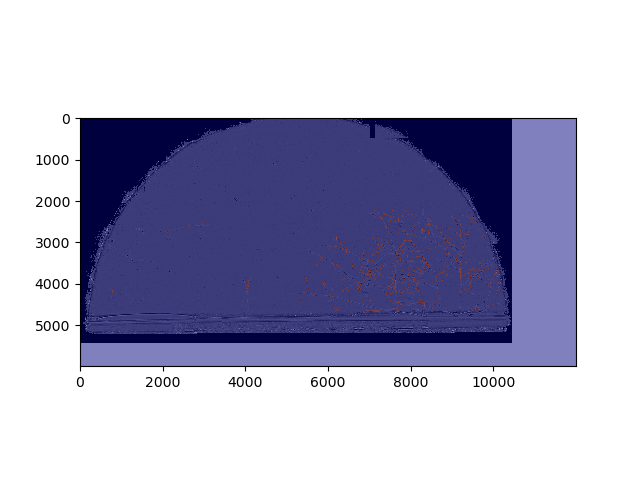

In [70]:
plt.close('all')
start = 0
finish = start + 1
for i in range(start,finish):
    plot_t_tp1([], [], None, None, skels[i], ims[i])

## Analysis

### Get orientation

In [12]:
edge_exp.orientation_begin(0)

NameError: name 'edge_exp' is not defined

In [ ]:
edge_exp.orientation_end(0)

In [38]:
edge_exp.pixel_list(0)

[(23015, 31330),
 (23015, 31331),
 (23015, 31332),
 (23015, 31333),
 (23014, 31333),
 (23014, 31334),
 (23013, 31334),
 (23013, 31335),
 (23012, 31335),
 (23011, 31335)]

## Brouillon

In [36]:
from amftrack.pipeline.functions.image_processing.experiment_util import plot_edge, get_random_edge, aux_plot_edge, plot_edge_mask

In [37]:
edge = get_random_edge(exp, 0)

<IPython.core.display.Javascript object>


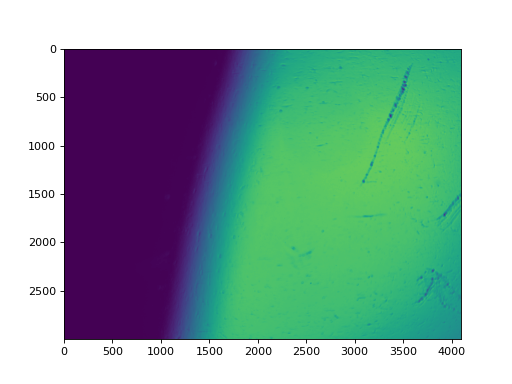

In [38]:
plot_edge_mask(edge, 0)